**Inport important Libraries**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

**Defining the url containing the data set**

In [60]:
url = "https://www.worldometers.info/population/countries-in-africa-by-population/"

**Read the data in the url (head)**

In [62]:
# Get the webpage content
response = requests.get(url)

# Parse the content of the webpage
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables on the page using pandas read_html
tables = pd.read_html(str(soup))

# Check how many tables were found
print(f"Number of tables found: {len(tables)}")

# If there are tables, load the first one
if tables:
    df = tables[0]  # Assuming the first table is the one you want
    print(df.head())  # Display the first few rows of the table
else:
    print("No tables found on the webpage.")

Number of tables found: 1
   # Country (or dependency)  Population (2025) Yearly Change Net Change  \
0  1                 Nigeria          237527782         2.08%    4848304   
1  2                Ethiopia          135472051         2.58%    3412284   
2  3                   Egypt          118365995         1.57%    1827737   
3  4                DR Congo          112832473         3.25%    3556208   
4  5                Tanzania           70545865          2.9%    1985708   

   Density (P/Km²)  Land Area (Km²) Migrants (net)  Fert. Rate  Median Age  \
0              261           910770        −15,258         4.3          18   
1              135          1000000          24054         3.8          19   
2              119           995450        −57,305         2.7          24   
3               50          2267050        −27,309         5.9          16   
4               80           885800        −12,730         4.5          17   

  Urban Pop % World Share  
0         55%       

<ipython-input-62-1b57bef89199>:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


In [63]:
df.head()

,#,Country (or dependency),Population (2025),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,Nigeria,237527782,2.08%,4848304,261,910770,"−15,258",4.3,18,55%,2.89%
1,2,Ethiopia,135472051,2.58%,3412284,135,1000000,24054,3.8,19,23%,1.65%
2,3,Egypt,118365995,1.57%,1827737,119,995450,"−57,305",2.7,24,41%,1.44%
3,4,DR Congo,112832473,3.25%,3556208,50,2267050,"−27,309",5.9,16,45%,1.37%
4,5,Tanzania,70545865,2.9%,1985708,80,885800,"−12,730",4.5,17,40%,0.86%


**Read the data in the url (tail)**

In [64]:
df.tail()

,#,Country (or dependency),Population (2025),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
53,54,Cabo Verde,527326,0.47%,2449,131,4030,"−1,284",1.5,29,79%,0.0064%
54,55,Mayotte,337011,3.22%,10506,899,375,44,4.5,17,41%,0.0041%
55,56,Sao Tome & Principe,240254,2%,4718,250,960,−650,3.5,19,78%,0.0029%
56,57,Seychelles,132779,1.81%,2361,289,460,1590,2.1,34,44%,0.0016%
57,58,Saint Helena,5197,−0.76%,−40,13,390,1,1.6,51,33%,0.000063%


In [65]:
df.shape

(58, 12)

In [66]:
from tabulate import tabulate

# Display the cleaned-up DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='pretty'))

+----+----+--------------------------+-------------------+---------------+------------+-----------------+-----------------+----------------+------------+------------+-------------+-------------+
|    | #  | Country (or dependency)  | Population (2025) | Yearly Change | Net Change | Density (P/Km²) | Land Area (Km²) | Migrants (net) | Fert. Rate | Median Age | Urban Pop % | World Share |
+----+----+--------------------------+-------------------+---------------+------------+-----------------+-----------------+----------------+------------+------------+-------------+-------------+
| 0  | 1  |         Nigeria          |     237527782     |     2.08%     |  4848304   |       261       |     910770      |    −15,258     |    4.3     |     18     |     55%     |    2.89%    |
| 1  | 2  |         Ethiopia         |     135472051     |     2.58%     |  3412284   |       135       |     1000000     |     24054      |    3.8     |     19     |     23%     |    1.65%    |
| 2  | 3  |          Egyp

In [67]:
df.describe()

,#,Population (2025),Density (P/Km²),Land Area (Km²),Fert. Rate,Median Age
count,58.000000,5.800000e+01,58.000000,5.800000e+01,58.000000,58.000000
mean,29.500000,2.672185e+07,134.310345,5.111807e+05,3.651724,21.672414
std,16.886879,4.076189e+07,179.207241,5.848486e+05,1.144819,6.865597
min,1.000000,5.197000e+03,2.000000,3.750000e+02,1.200000,14.000000
25%,15.250000,2.569874e+06,29.000000,2.868000e+04,2.700000,18.000000
50%,29.500000,1.447967e+07,71.000000,2.698000e+05,3.750000,19.000000
75%,43.750000,3.273340e+07,134.000000,8.140625e+05,4.200000,22.000000
max,58.000000,2.375278e+08,899.000000,2.381740e+06,5.900000,51.000000


In [68]:
df.columns

Index(['#', 'Country (or dependency)', 'Population (2025)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [50]:
df2 =df[['Population (2025)', 'Yearly Change','Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']]

In [51]:
df2.head()

,Population (2025),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,237527782,2.08%,4848304,261,910770,"−15,258",4.3,18,55%,2.89%
1,135472051,2.58%,3412284,135,1000000,24054,3.8,19,23%,1.65%
2,118365995,1.57%,1827737,119,995450,"−57,305",2.7,24,41%,1.44%
3,112832473,3.25%,3556208,50,2267050,"−27,309",5.9,16,45%,1.37%
4,70545865,2.9%,1985708,80,885800,"−12,730",4.5,17,40%,0.86%


**Data cleaning**

In [91]:
# Convert columns to string type first
df2['Urban Pop %'] = df2['Urban Pop %'].astype(str)
df2['Yearly Change'] = df2['Yearly Change'].astype(str)
df2['World Share'] = df2['World Share'].astype(str)
df2['Net Change'] = df2['Net Change'].astype(str)  # Include 'Net Change'
df2['Migrants (net)'] = df2['Migrants (net)'].astype(str) # Include 'Migrants


# Then, convert Urban pop % column to numeric by removing '%' and converting to float
df2['Urban Pop %'] = df2['Urban Pop %'].str.rstrip('%').astype(float)


# Replacing the special minus sign − with the standard minus sign -
df2['Yearly Change'] = df2['Yearly Change'].str.replace('−', '-').str.rstrip('%').astype(float)
df2['World Share'] = df2['World Share'].str.replace('−', '-').str.rstrip('%').astype(float)

# Remove special characters (like commas and special minus signs) and convert to float

df2['Net Change'] = df2['Net Change'].str.replace('−', '-').str.replace(',', '').astype(float)  # Apply to 'Net Change'
df2['Migrants (net)'] = df2['Migrants (net)'].str.replace('−', '-').str.replace(',', '').astype(float) # Apply to 'Migrants (net)'




**Correlation  Matrix**

In [92]:
df2.corr()

,Population (2025),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
Population (2025),1.000000,0.173186,0.961195,-0.044551,0.481102,0.017805,0.198767,-0.188145,-0.150138,0.999991
Yearly Change,0.173186,1.000000,0.307684,-0.076450,0.287221,-0.110809,0.918042,-0.877446,-0.272367,0.172825
Net Change,0.961195,0.307684,1.000000,-0.059307,0.511713,-0.011295,0.346852,-0.282583,-0.219225,0.960892
Density (P/Km²),-0.044551,-0.076450,-0.059307,1.000000,-0.407305,-0.049113,-0.095162,0.065462,-0.315826,-0.045140
Land Area (Km²),0.481102,0.287221,0.511713,-0.407305,1.000000,0.173969,0.329636,-0.175410,0.036719,0.481699
Migrants (net),0.017805,-0.110809,-0.011295,-0.049113,0.173969,1.000000,-0.137313,0.108805,0.097335,0.018487
Fert. Rate,0.198767,0.918042,0.346852,-0.095162,0.329636,-0.137313,1.000000,-0.823230,-0.364807,0.198363
Median Age,-0.188145,-0.877446,-0.282583,0.065462,-0.175410,0.108805,-0.823230,1.000000,0.289649,-0.187781
Urban Pop %,-0.150138,-0.272367,-0.219225,-0.315826,0.036719,0.097335,-0.364807,0.289649,1.000000,-0.150085
World Share,0.999991,0.172825,0.960892,-0.045140,0.481699,0.018487,0.198363,-0.187781,-0.150085,1.000000


**Plotting Scatter Plots**

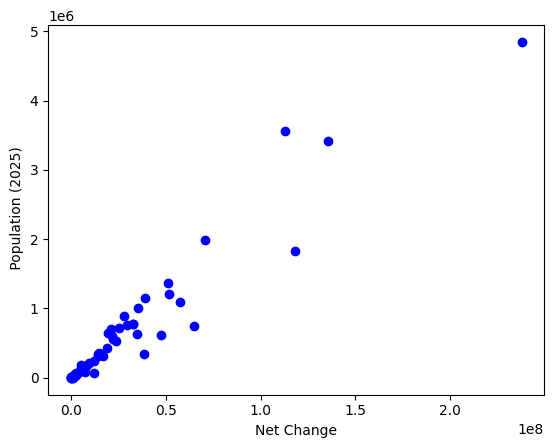

In [98]:
plt.scatter(df2['Population (2025)'],df2['Net Change'], color = "blue" )
plt.ylabel(" Population (2025)")
plt.xlabel("Net Change")
plt.show()



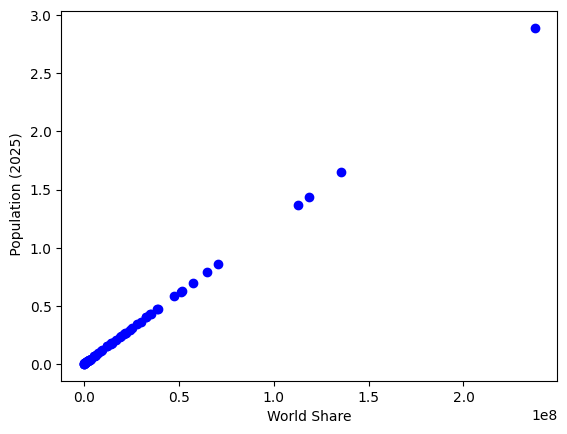

In [99]:
plt.scatter(df2['Population (2025)'],df2['World Share'], color = "blue" )
plt.ylabel(" Population (2025)")
plt.xlabel("World Share")
plt.show()

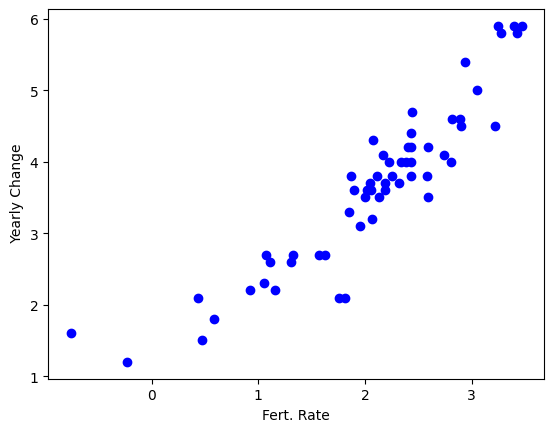

In [100]:
plt.scatter(df2['Yearly Change'],df2['Fert. Rate'], color = "blue" )
plt.ylabel(" Yearly Change")
plt.xlabel("Fert. Rate")
plt.show()

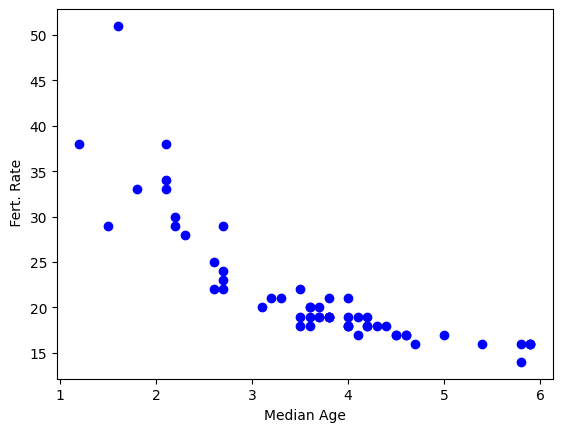

In [101]:
plt.scatter(df2['Fert. Rate'],df2['Median Age'], color = "blue" )
plt.ylabel(" Fert. Rate")
plt.xlabel("Median Age")
plt.show()

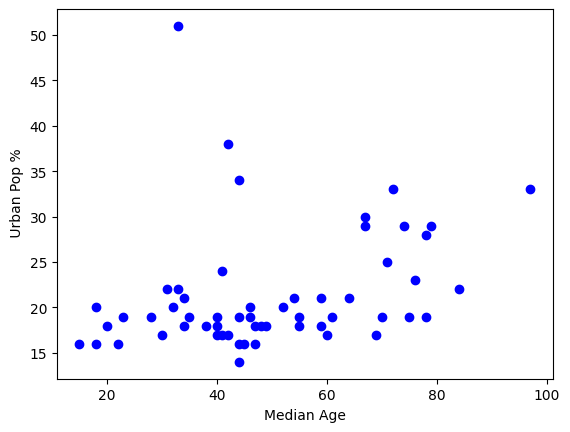

In [103]:
plt.scatter(df2['Urban Pop %'],df2['Median Age'], color = "blue" )
plt.ylabel(" Urban Pop %")
plt.xlabel("Median Age")
plt.show()

**Create a machine to test the dataset**

In [104]:
msk =np.random.rand(len(df))<0.8
train =df2[msk]
test = df2[~msk]

**Modellimng: Y = A+BX**


In [105]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x =np.asanyarray(train[['Net Change']])
train_y = np.asanyarray(train[['Population (2025)']])
regr.fit(train_x, train_y)

print("coefficients:" , regr.coef_)
print("intercept:", regr.intercept_)

coefficients: [[38.9904133]]
intercept: [2679564.67903848]


Population (2025) = 2679564.67 + 39.0* Net Change

**Ploting a straight line**

Text(0, 0.5, 'Population (2025)')

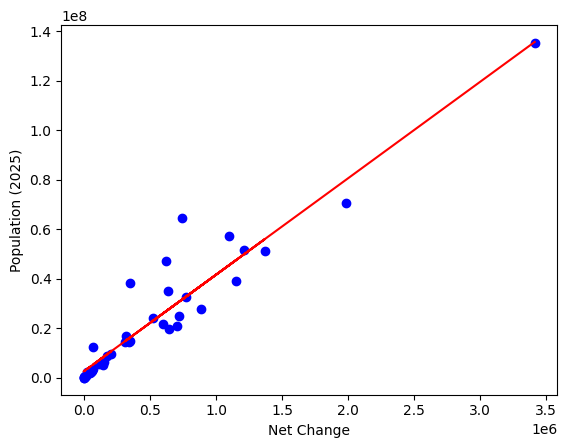

In [109]:
plt.scatter(train['Net Change'],train['Population (2025)'], color = "blue" )
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Net Change")
plt.ylabel("Population (2025)")

plt.ylabel("Population (2025)")

**EVALUATION**

In [111]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Net Change']])
test_y = np.asanyarray(test[['Population (2025)']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 9568999.17
Residual sum of squares (MSE): 331125970492264.44
R2-score: 0.89


** The model explains 89% of the variation in the data. However, to improve accuracy, we should try multiple linear regression and polynomial regression to capture more complex relationships.**

**MULTIPLE LINEAR REGRESSION**

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [124]:
ln = LinearRegression()
ln

LinearRegression()

In [125]:
Z = df2[['Population (2025)', 'Yearly Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']]

In [126]:
# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median'

# Fit the imputer to your data and transform it
Z_imputed = imputer.fit_transform(Z)

# Create a new DataFrame with the imputed values
Z_imputed_df = pd.DataFrame(Z_imputed, columns=Z.columns)

In [129]:
ln = LinearRegression()
ln.fit(Z_imputed_df, df2['Net Change'])

LinearRegression()

**The intercept**

In [133]:
ln.intercept_

np.float64(-770727.3275806948)

**The coeficient**

In [134]:
ln.coef_

array([ 3.47849185e-01,  9.40166539e+04, -1.00880490e+02,  2.61909215e-02,
       -1.36696852e-04,  1.13440260e+05,  1.42762053e+04, -2.03816313e+03,
       -2.68741816e+07])

**Multiple Regression Model**

Net Change = -770727.3 + 3.48Population (2025) + 9.40Yearly Change + 1.01Density (P/Km²) +22.61Land Area (Km²) + -1.37Migrants (net) + 1.13Fert. Rate + 1.43Median Age + -2.04Urban Pop + -2.69World Share'

In [138]:
Y_hat = ln.predict(Z_imputed_df)
Y_hat[0:5]

array([5012479.95412482, 2921290.46638283, 2430999.98486121,
       2826217.12063593, 1616227.8078844 ])

In [150]:
from sklearn.metrics import r2_score, mean_squared_error # Import mean_squared_error
# Step 1: Calculate R-squared and Mean Squared Error (MSE)
y_actual = df2['Net Change']
# Assign the predicted values to a new column in the DataFrame
df2['predicted Net change'] = Y_hat
y_pred = df2['predicted Net change'] # Now you can access this column


# R-squared
r_squared = r2_score(y_actual, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, y_pred)

print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 0.9561
Mean Squared Error: 36747506238.2678


**The model is 95% accurate, this implies that MUltiple Regression is better than linear Regression in making predictions.**

**Drawing Graphs**

<ipython-input-151-3967e4c7ff7f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_actual, hist=False, color="r", label="Actual Net Change")
<ipython-input-151-3967e4c7ff7f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Net Chang

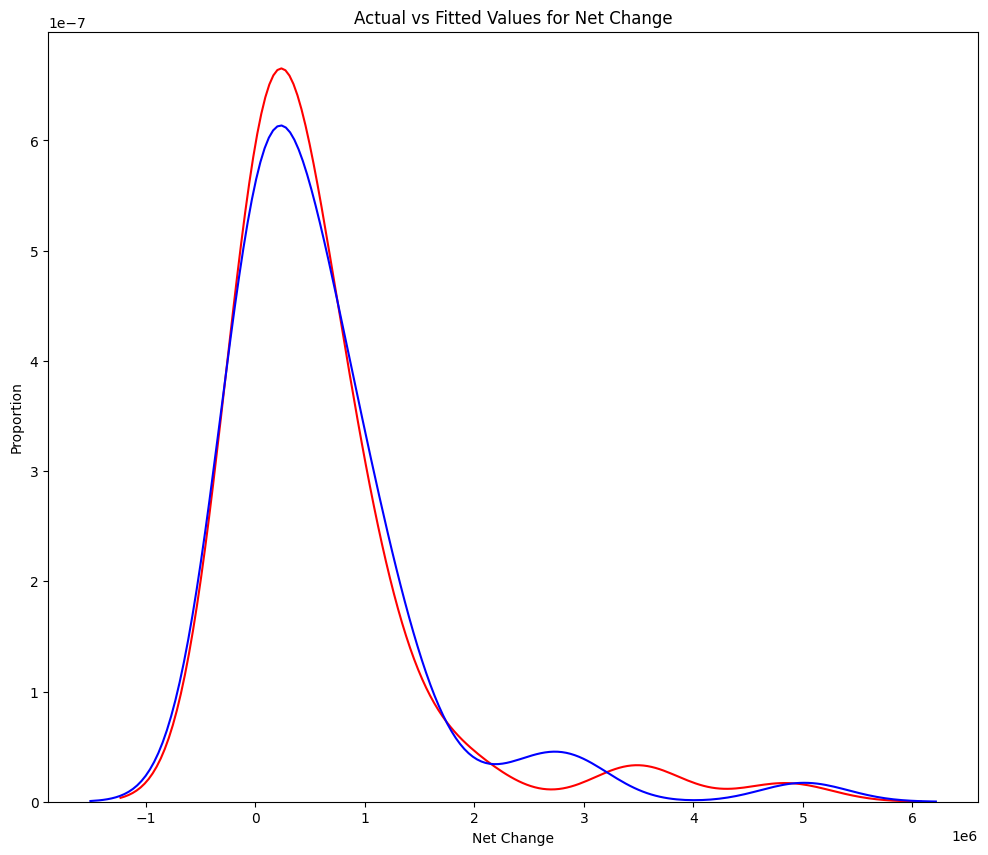

In [151]:
# Graphical representation (Actual vs Fitted Values)
width = 12
height = 10
plt.figure(figsize=(width, height))

# Plot Actual vs Predicted (Fitted) values
sns.distplot(y_actual, hist=False, color="r", label="Actual Net Change")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Net Change")

# Adding titles and labels
plt.title('Actual vs Fitted Values for Net Change')
plt.xlabel('Net Change')
plt.ylabel('Proportion')

# Show the plot
plt.show()
plt.close()

**Polynomial Regression**

In [168]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the features and target variable

X = df2[['Median Age', 'Fert. Rate']]  # Independent variables
y = df2['Net Change']  # Dependent variable

In [169]:
# Transform the features to polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Transform the features into polynomial features

In [170]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [171]:
# Create and fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [172]:
# Make predictions using the test set
y_pred = model.predict(X_test)

In [174]:
# Calculate R-squared and Mean Squared Error (MSE)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Output the R-squared and MSE values
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")



R-squared: 0.0084
Mean Squared Error: 2257302829263.7935


**An R-squared of 0.0084 indicates that the model explains only 0.84% of the variability in the data, suggesting poor performance and that the model may be missing key relationships or is not well-suited for the data.**

**Drawing Graphs**

<ipython-input-175-c295cecdc457>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Net Change")
<ipython-input-175-c295cecdc457>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Predicted Net Chan

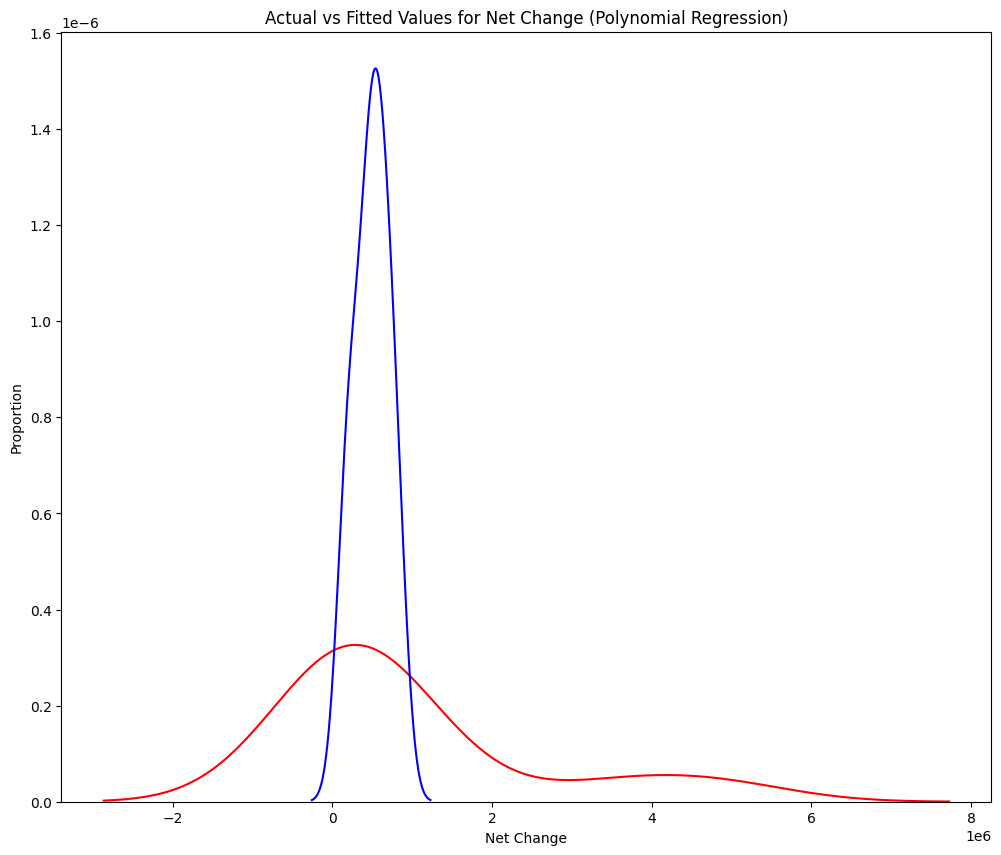

In [175]:
# Graphical representation (Actual vs Predicted Values)
width = 12
height = 10
plt.figure(figsize=(width, height))

# Plot Actual vs Predicted (Fitted) values
sns.distplot(y_test, hist=False, color="r", label="Actual Net Change")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Net Change")

# Adding titles and labels
plt.title('Actual vs Fitted Values for Net Change (Polynomial Regression)')
plt.xlabel('Net Change')
plt.ylabel('Proportion')

# Show the plot
plt.show()
plt.close()

**CONCLUSION: **

1. Linear Regression R- Squared value and mean score error = 89% and 9568999.17respectively
2. Multiple Regression R -Squared value and mean score error = 95% and 36747506238.26 respectively
3. Pollynmial Regression R- Squares value and mean score error = 0.84% and 2257302829263.79respectively


The Multiple Regression model appears to perform best in terms of explaining the variability in the data (with 95% R-squared), though its high MSE indicates significant prediction errors. Linear Regression is a good alternative, with strong explanatory power and lower error. Polynomial Regression, however, performs poorly, as it explains very little of the data's variability and has large prediction errors. **bold text**